# 第9天：分类算法基础（逻辑回归、决策树）🚀

## 学习目标
1. 理解分类问题的基本概念
2. 掌握逻辑回归和决策树的原理与实现
3. 学会分类模型的评估方法
4. 完成鸢尾花分类项目实战

## 今日重点
- 分类vs回归的区别
- 逻辑回归的数学原理
- 决策树的构建过程
- 分类模型评估指标

# 1. 分类问题简介 📚

## 什么是分类？

分类是机器学习中最常见的问题之一，目标是将数据分到不同的类别中。

### 分类的类型

| 类型 | 描述 | 例子 |
|------|------|------|
| **二分类** | 只有两个类别 | 垃圾邮件/正常邮件、肿瘤良/恶性 |
| **多分类** | 有三个及以上类别 | 鸢尾花分类、手写数字识别 |

## 分类与回归的区别

| 特征 | 回归 | 分类 |
|------|------|------|
| **输出类型** | 连续值 | 离散类别 |
| **例子** | 房价预测 | 邮件分类 |
| **评估指标** | MSE、R² | 准确率、精确率、召回率 |
| **算法** | 线性回归 | 逻辑回归、决策树、SVM |

## 分类问题的应用场景

- **医疗诊断**：疾病预测、药物分类
- **金融风控**：信用评估、欺诈检测
- **图像识别**：人脸识别、物体检测
- **自然语言处理**：情感分析、文本分类

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_curve, auc
)
from sklearn.datasets import load_iris, make_classification

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 库导入成功！")

✅ 库导入成功！


# 2. 逻辑回归原理与实践 🔍

## 2.1 逻辑回归原理

逻辑回归虽然名字叫"回归"，但实际上是用于分类的算法。它的核心思想是：

### 数学原理

**线性回归的输出**：
```
z = w^T x + b
```

**逻辑回归的输出**：
```
P(y=1|x) = σ(z) = 1 / (1 + e^(-z))
```

其中 σ(z) 是 **sigmoid函数**，将任意实数映射到 (0,1) 区间。

### Sigmoid函数的特点

- **输出范围**：(0,1)
- **单调递增**：输入越大，输出越接近1
- **对称性**：σ(-z) = 1 - σ(z)
- **概率解释**：输出可以解释为属于正类的概率

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

📊 Sigmoid函数可视化


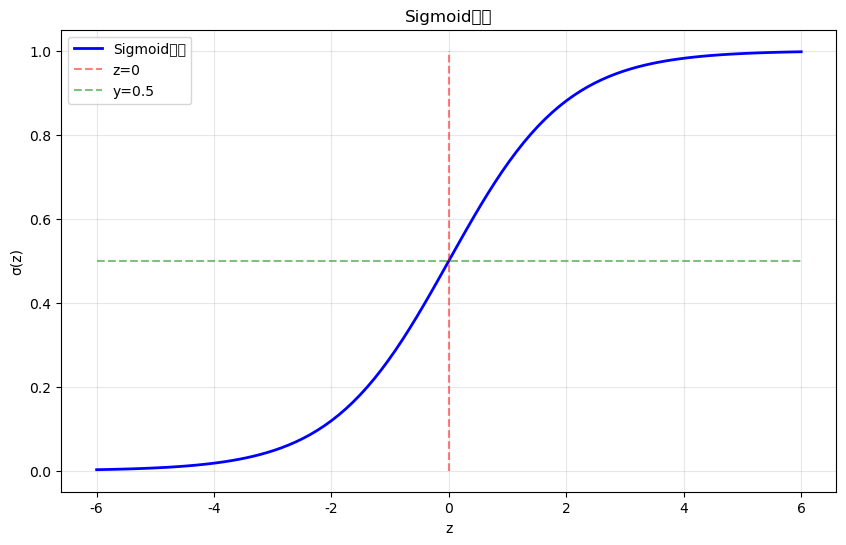

💡 观察：
- 当 z > 0 时，σ(z) > 0.5，倾向于预测为正类
- 当 z < 0 时，σ(z) < 0.5，倾向于预测为负类
- 当 z = 0 时，σ(z) = 0.5，决策边界


In [3]:
# 2.2 Sigmoid函数可视化
print("📊 Sigmoid函数可视化")

def sigmoid(z):
    """Sigmoid函数"""
    return 1 / (1 + np.exp(-z))

# 生成数据
z = np.linspace(-6, 6, 100)
sigmoid_z = sigmoid(z)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_z, 'b-', linewidth=2, label='Sigmoid函数')
plt.plot([0, 0], [0, 1], 'r--', alpha=0.5, label='z=0')
plt.plot([-6, 6], [0.5, 0.5], 'g--', alpha=0.5, label='y=0.5')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid函数')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("💡 观察：")
print("- 当 z > 0 时，σ(z) > 0.5，倾向于预测为正类")
print("- 当 z < 0 时，σ(z) < 0.5，倾向于预测为负类")
print("- 当 z = 0 时，σ(z) = 0.5，决策边界")

## 2.3 损失函数（对数损失）

逻辑回归使用**对数损失**（也叫交叉熵损失）：

```
L = -[y log(ŷ) + (1-y) log(1-ŷ)]
```

其中：
- y：真实标签（0或1）
- ŷ：预测概率

### 为什么用对数损失？

1. **概率解释**：输出是概率，对数损失适合概率模型
2. **凸函数**：便于优化
3. **惩罚机制**：对错误预测给予更大的惩罚

In [4]:
# 2.4 逻辑回归代码实践（鸢尾花二分类）
print("🎯 逻辑回归实战：鸢尾花二分类")

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

print(f"数据集形状: X={X.shape}, y={y.shape}")
print(f"特征名称: {iris.feature_names}")
print(f"类别名称: {iris.target_names}")

# 只取前两类（0和1）做二分类
X_bin = X[y < 2]
y_bin = y[y < 2]

print(f"\n二分类数据形状: X={X_bin.shape}, y={y_bin.shape}")
print(f"类别分布: {np.bincount(y_bin)}")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=42
)

print(f"\n训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

# 创建逻辑回归模型
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# 预测
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

# 评估
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 模型评估结果:")
print(f"准确率: {acc:.4f}")
print(f"\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))
print(f"\n分类报告:")
print(classification_report(y_test, y_pred))

# 查看模型参数
print(f"\n🔧 模型参数:")
print(f"权重: {logreg.coef_[0]}")
print(f"偏置: {logreg.intercept_[0]:.4f}")
print(f"\n特征重要性:")
for i, (name, coef) in enumerate(zip(iris.feature_names, logreg.coef_[0])):
    print(f"{name}: {coef:.4f}")

🎯 逻辑回归实战：鸢尾花二分类
数据集形状: X=(150, 4), y=(150,)
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别名称: ['setosa' 'versicolor' 'virginica']

二分类数据形状: X=(100, 4), y=(100,)
类别分布: [50 50]

训练集大小: 80
测试集大小: 20

📊 模型评估结果:
准确率: 1.0000

混淆矩阵:
[[12  0]
 [ 0  8]]

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


🔧 模型参数:
权重: [ 0.46248518 -0.84445753  2.21233212  0.92744332]
偏置: -6.5245

特征重要性:
sepal length (cm): 0.4625
sepal width (cm): -0.8445
petal length (cm): 2.2123
petal width (cm): 0.9274


## 2.5 逻辑回归决策边界可视化

我们用前两个特征做二维可视化，展示决策边界。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/envs/ml_learning/lib/python3.9/

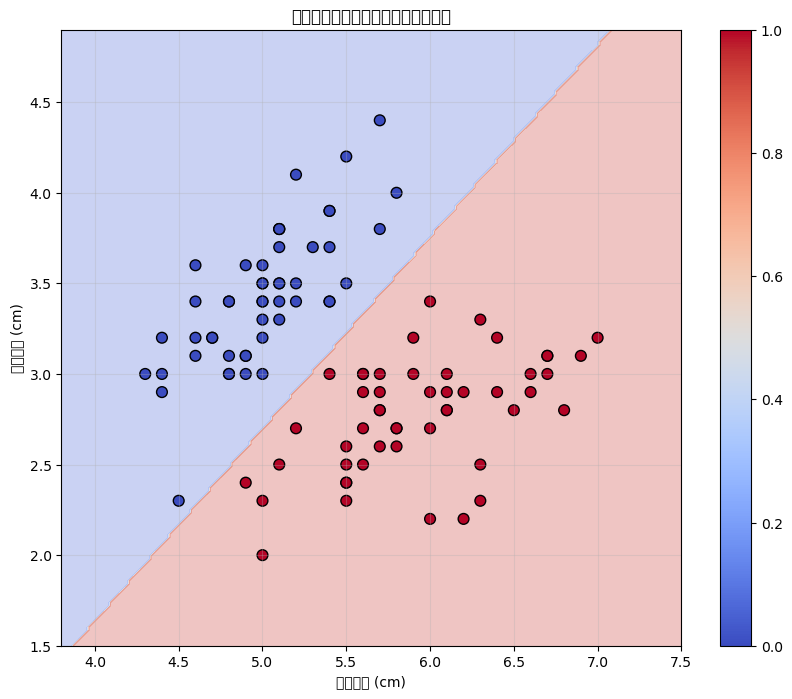

💡 观察决策边界:
- 红色区域：预测为类别1
- 蓝色区域：预测为类别0
- 边界线：决策边界，σ(z) = 0.5


In [5]:
# 只用前两个特征做可视化
X2 = X_bin[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y_bin, test_size=0.2, random_state=42
)

# 训练模型
logreg2 = LogisticRegression(random_state=42)
logreg2.fit(X2_train, y2_train)

# 创建网格点
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 预测网格点的类别
Z = logreg2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 可视化
plt.figure(figsize=(10, 8))

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 绘制数据点
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=y_bin, 
                      edgecolors='k', cmap=plt.cm.coolwarm, s=60)

plt.xlabel('花萼长度 (cm)')
plt.ylabel('花萼宽度 (cm)')
plt.title('逻辑回归决策边界（鸢尾花二分类）')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()

print("💡 观察决策边界:")
print("- 红色区域：预测为类别1")
print("- 蓝色区域：预测为类别0")
print("- 边界线：决策边界，σ(z) = 0.5")

# 3. 决策树原理与实践 🌳

## 3.1 决策树原理

决策树是一种树形结构的分类模型，通过一系列if-else规则将数据分到不同类别。

### 决策树的特点

**优点：**
- 可解释性强（类似流程图）
- 可处理非线性关系
- 可处理分类和数值特征
- 不需要特征缩放

**缺点：**
- 容易过拟合
- 对数据变化敏感
- 可能产生过于复杂的树

### 决策树的构建过程

1. **选择最佳分割特征**：计算信息增益或基尼指数
2. **确定分割点**：找到最优的分割阈值
3. **递归分割**：对子节点重复上述过程
4. **停止条件**：达到最大深度、节点样本数过少等

In [ ]:
# 3.2 决策树代码实践（鸢尾花三分类）
print("🌳 决策树实战：鸢尾花三分类")

# 使用完整的鸢尾花数据集（三分类）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 创建决策树模型
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# 预测
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict_proba(X_test)

# 评估
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 决策树评估结果:")
print(f"准确率: {acc:.4f}")
print(f"\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))
print(f"\n分类报告:")
print(classification_report(y_test, y_pred))

# 查看特征重要性
print(f"\n🔧 特征重要性:")
for i, (name, importance) in enumerate(zip(iris.feature_names, dtree.feature_importances_)):
    print(f"{name}: {importance:.4f}")

In [ ]:
# 3.3 决策树可视化
print("📊 决策树结构可视化")

plt.figure(figsize=(20, 10))
plot_tree(dtree, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('决策树结构（鸢尾花三分类）', fontsize=16)
plt.show()

print("💡 决策树解读:")
print("- 每个节点显示分割条件和样本分布")
print("- 颜色表示主要类别")
print("- 叶子节点显示最终预测结果")

## 3.4 决策树深度的影响

让我们观察不同深度对模型性能的影响。

In [ ]:
# 测试不同深度的决策树
depths = [1, 2, 3, 4, 5, 10, None]
train_scores = []
test_scores = []

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(X_train, y_train)
    
    train_score = accuracy_score(y_train, dtree.predict(X_train))
    test_score = accuracy_score(y_test, dtree.predict(X_test))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='训练集准确率', linewidth=2)
plt.plot(depths, test_scores, 's-', label='测试集准确率', linewidth=2)
plt.xlabel('最大深度')
plt.ylabel('准确率')
plt.title('决策树深度对性能的影响')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("💡 观察结果:")
print("- 深度太浅：模型欠拟合，训练和测试准确率都低")
print("- 深度适中：模型泛化能力好")
print("- 深度太深：模型过拟合，训练准确率高但测试准确率下降")

# 4. 分类模型评估方法 📈

## 4.1 常用评估指标

### 准确率（Accuracy）
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

### 精确率（Precision）
```
Precision = TP / (TP + FP)
```

### 召回率（Recall）
```
Recall = TP / (TP + FN)
```

### F1分数
```
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```

其中：
- TP：真正例（预测为正类，实际为正类）
- TN：真负例（预测为负类，实际为负类）
- FP：假正例（预测为正类，实际为负类）
- FN：假负例（预测为负类，实际为正类）

In [ ]:
# 4.2 混淆矩阵可视化
print("📊 混淆矩阵可视化")

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('混淆矩阵')
plt.show()

print("💡 混淆矩阵解读:")
print("- 对角线元素：正确分类的样本数")
print("- 非对角线元素：错误分类的样本数")
print("- 颜色越深表示数值越大")

In [ ]:
# 4.3 ROC曲线（二分类）
print("📈 ROC曲线分析（二分类）")

# 使用逻辑回归的二分类结果
y_test_bin = y_test[y_test < 2]  # 只取前两类
y_pred_proba_bin = logreg.predict_proba(X_test[y_test < 2])[:, 1]

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba_bin)
roc_auc = auc(fpr, tpr)

# 可视化
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真阳性率 (TPR)')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print("💡 ROC曲线解读:")
print("- AUC = 1.0：完美分类器")
print("- AUC = 0.5：随机分类器")
print("- AUC < 0.5：比随机还差")
print(f"- 当前AUC = {roc_auc:.2f}：模型表现良好")

# 5. 模型比较与总结 🔍

## 5.1 逻辑回归vs决策树比较

让我们比较两种算法的性能：

In [1]:
# 5.2 模型比较
print("🔍 逻辑回归 vs 决策树 比较")

# 逻辑回归（三分类）
logreg_multi = LogisticRegression(random_state=42, max_iter=1000)
logreg_multi.fit(X_train, y_train)
logreg_pred = logreg_multi.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

# 决策树（三分类）
dtree_multi = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_multi.fit(X_train, y_train)
dtree_pred = dtree_multi.predict(X_test)
dtree_acc = accuracy_score(y_test, dtree_pred)

# 比较结果
print(f"\n📊 模型性能比较:")
print(f"逻辑回归准确率: {logreg_acc:.4f}")
print(f"决策树准确率: {dtree_acc:.4f}")

# 可视化比较
models = ['逻辑回归', '决策树']
accuracies = [logreg_acc, dtree_acc]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylabel('准确率')
plt.title('逻辑回归 vs 决策树 性能比较')
plt.ylim(0, 1)

# 在柱状图上添加数值
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 模型特点总结:")
print("逻辑回归:")
print("- 优点：训练快、可解释性强、不易过拟合")
print("- 缺点：只能处理线性关系")
print("\n决策树:")
print("- 优点：可处理非线性关系、可解释性强")
print("- 缺点：容易过拟合、对数据敏感")

🔍 逻辑回归 vs 决策树 比较


NameError: name 'LogisticRegression' is not defined

# 6. 练习与思考题 💭

## 6.1 概念理解题

1. **分类和回归的本质区别是什么？**
   - 输出类型：分类输出离散类别，回归输出连续值
   - 评估指标：分类用准确率、精确率等，回归用MSE、R²等
   - 应用场景：分类用于预测类别，回归用于预测数值

2. **逻辑回归和线性回归的联系与区别？**
   - 联系：都使用线性函数 w^T x + b
   - 区别：线性回归直接输出，逻辑回归通过sigmoid函数输出概率

3. **决策树如何避免过拟合？**
   - 限制最大深度
   - 设置最小样本数
   - 使用剪枝技术
   - 使用集成方法（随机森林等）

4. **什么是混淆矩阵？如何解读？**
   - 混淆矩阵显示预测结果与真实标签的对比
   - 对角线元素表示正确分类的样本数
   - 非对角线元素表示错误分类的样本数

5. **精确率、召回率、F1分数分别适合什么场景？**
   - 精确率：关注预测为正类的准确性（如垃圾邮件检测）
   - 召回率：关注找出所有正类的能力（如疾病检测）
   - F1分数：平衡精确率和召回率

## 6.2 编程练习题

1. **尝试不同的逻辑回归参数**
   ```python
   # 尝试不同的正则化参数
   logreg = LogisticRegression(C=0.1, random_state=42)
   ```

2. **比较不同深度的决策树**
   ```python
   # 测试不同max_depth参数
   depths = [1, 2, 3, 4, 5]
   ```

3. **使用其他数据集练习**
   ```python
   from sklearn.datasets import load_breast_cancer
   cancer = load_breast_cancer()
   ```

## 6.3 思考题

1. **现实中哪些问题适合用分类算法？**
   - 医疗诊断：疾病预测
   - 金融风控：信用评估
   - 图像识别：物体分类
   - 自然语言处理：文本分类

2. **决策树为什么容易过拟合？如何解决？**
   - 原因：树可以无限生长，记住所有训练数据
   - 解决：限制深度、剪枝、使用集成方法

3. **逻辑回归能否用于多分类？如何实现？**
   - 可以，通过One-vs-Rest或One-vs-One策略
   - sklearn默认使用One-vs-Rest

---
**今日总结**：你已经掌握了分类算法的基本原理和实现方法！明天我们将学习更高级的分类算法。